In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import tqdm
import os

In [56]:
train_images_neg="./dataset/train/negative/"
train_images_pos="./dataset/train/positive/"
test_images="./dataset/test"
image_size=128

In [57]:
train_data=[]
labels=(len(os.listdir(train_images_neg)),len(os.listdir(train_images_pos)))
for image in os.listdir(train_images_neg):
    path = os.path.join(train_images_neg, image)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    img = cv2.resize(img, (image_size, image_size)).flatten()   
    train_data.append(np.asarray(img))
    
for image2 in os.listdir(train_images_pos): 
    path = os.path.join(train_images_pos, image2)
    img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    img2 = cv2.resize(img2, (image_size, image_size)).flatten() 
    train_data.append(np.asarray(img2))    

In [58]:
train_labels=np.concatenate((np.zeros(labels[0]),np.ones(labels[1])),axis=0)

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)


In [62]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

C:\Users\snapp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
y_pred=model.predict(x_test)

from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
print(f"accuracy: {acc}")


accuracy: 0.6965637740244612


In [64]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred,labels=[0,1])
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[613 232]
 [289 583]]


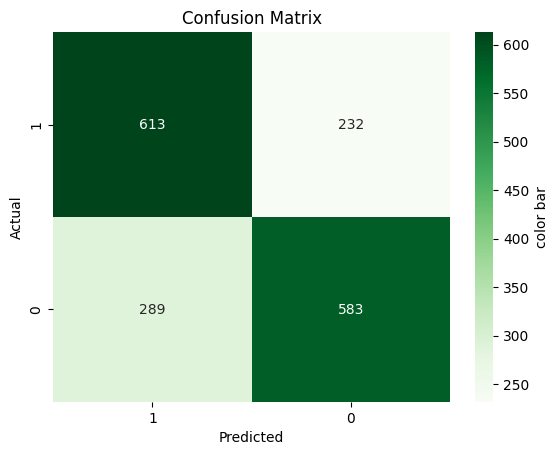

In [72]:
sns.heatmap(cm,cmap="Greens",annot=True,fmt='g',
            cbar_kws={"orientation":"vertical","label":"color bar"},
            xticklabels=[1,0],yticklabels=[1,0])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()